In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from functools import reduce
import re as re
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [2]:
# Loading all "csv" files.
# I named the files as per the orginal name associated with "csv" files.
framenames =[]
varsname =[]
for file in os.listdir("DataSet"):    
    if file.endswith(".csv"):
        filepath = os.path.join("DataSet", file)
        name = [i.split(".") for i in file.split("_")]
        name = reduce(lambda x, y: x + y ,name)[:-1]
        name = "_".join(name)
        vars()[name] = pd.read_csv(filepath, encoding = 'unicode_escape')
        print(name)
        framenames.append(name)
        varsname.append(vars()[name])

application_test
HomeCredit_columns_description
POS_CASH_balance
credit_card_balance
installments_payments
application_train
bureau
previous_application
bureau_balance
sample_submission


In [3]:
# Memory saving function credit to https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [4]:
application_test = reduce_mem(application_test)
HomeCredit_columns_description = reduce_mem(HomeCredit_columns_description )
POS_CASH_balance = reduce_mem(POS_CASH_balance)
credit_card_balance = reduce_mem(credit_card_balance)
installments_payments = reduce_mem(installments_payments)
application_train = reduce_mem(application_train)
bureau= reduce_mem(bureau)
previous_application = reduce_mem(previous_application )
bureau_balance = reduce_mem(bureau_balance)

Memory usage of dataframe is 45.00 MB
Memory usage after optimization is: 14.60 MB
Decreased by 67.6%
Memory usage of dataframe is 0.01 MB
Memory usage after optimization is: 0.01 MB
Decreased by 14.9%
Memory usage of dataframe is 610.43 MB
Memory usage after optimization is: 238.45 MB
Decreased by 60.9%
Memory usage of dataframe is 673.88 MB
Memory usage after optimization is: 289.33 MB
Decreased by 57.1%
Memory usage of dataframe is 830.41 MB
Memory usage after optimization is: 311.40 MB
Decreased by 62.5%
Memory usage of dataframe is 286.23 MB
Memory usage after optimization is: 92.38 MB
Decreased by 67.7%
Memory usage of dataframe is 222.62 MB
Memory usage after optimization is: 112.95 MB
Decreased by 49.3%
Memory usage of dataframe is 471.48 MB
Memory usage after optimization is: 309.01 MB
Decreased by 34.5%
Memory usage of dataframe is 624.85 MB
Memory usage after optimization is: 338.46 MB
Decreased by 45.8%


In [5]:
dfs =  [application_test,HomeCredit_columns_description,POS_CASH_balance,credit_card_balance,installments_payments,
       application_train,bureau, previous_application, bureau_balance, sample_submission]



## EDA of application_train

In [6]:
train= application_train.copy()
test = application_test.copy()
train.describe()


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.0,265992.0,265992.0
mean,278180.518577,0.080729,0.417052,1.687391e+05,5.988308e+05,27110.958984,5.379796e+05,0.020859,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006401,0.007000,0.034302,NaN,NaN,NaN
std,102790.175348,0.272419,0.722121,2.371759e+05,4.024795e+05,14493.233398,3.695427e+05,0.013824,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083984,0.110718,0.204712,0.0,NaN,0.0
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010010,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018845,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028656,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,3.0
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072510,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.0,261.0,25.0


#### Exploring the missing values

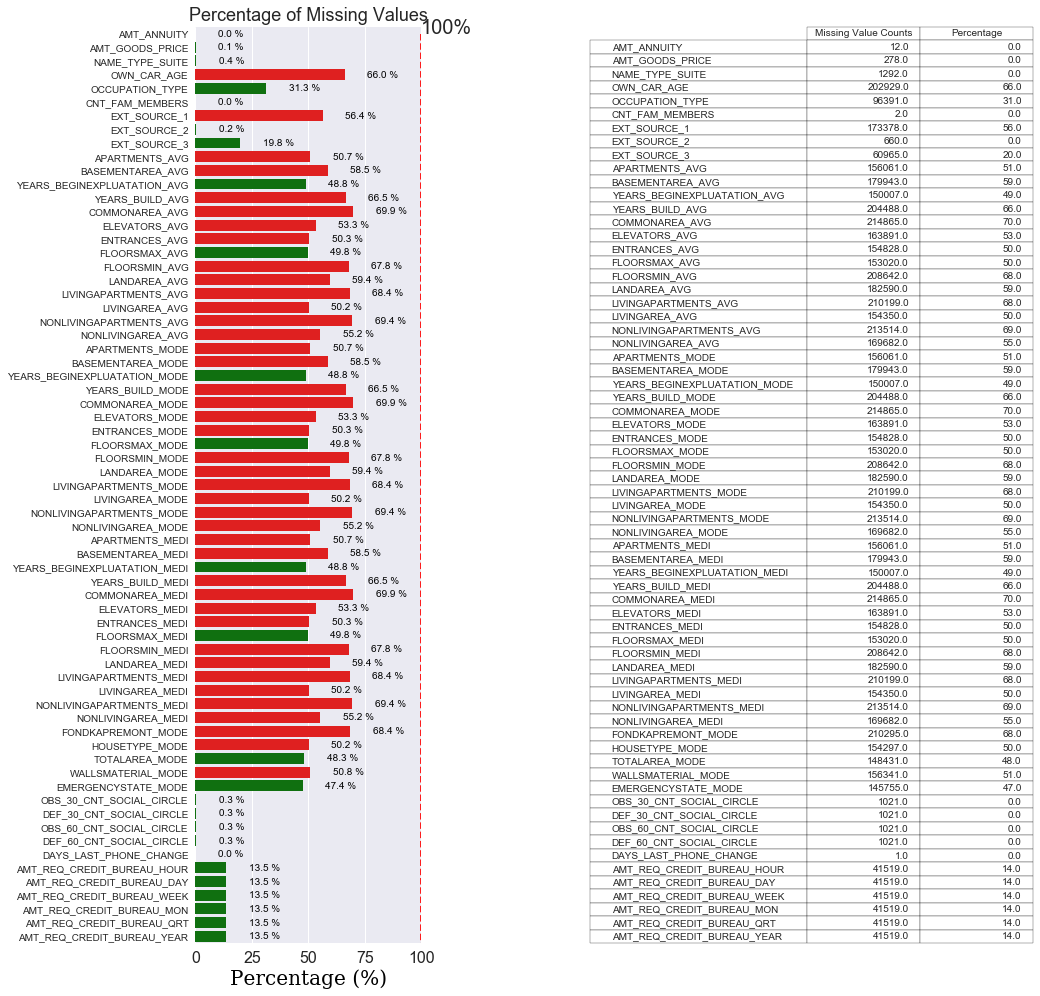

In [7]:
def missing_values(df, figsize=(10, 14)):
    misval= df.isnull().sum()
    df_misval = pd.DataFrame(misval[misval!=0])
    df_misval.columns = ['frequency']
    df_misval["percentage"] = (df_misval/len(df))*100
    df_misval =df_misval
    
    # If there are more than 50 % values are missing, it will appear as red. 
    colors = ['red' if (x > 50.00) else 'green' for x in df_misval['percentage']]
    # Now Plotting missing values as well as the dataframe
    f, (ax1, ax2) = plt.subplots(1,2, figsize=figsize)

    b= sns.barplot(x= "percentage", y = df_misval.index,
                data = df_misval, palette=colors, label = "biggest", ax = ax1)
    font = {'family': 'serif','color':  'black', 'weight': 'normal','size': 20}
    b.set_xlim(0,100)
    b.set_xlabel("Percentage (%)", fontdict = font)
    b.set_title("Percentage of Missing Values", fontsize = 18)
    b.vlines(x= 100, ymin =0, ymax=100, color='r', linestyle='--', label = "100%")
    # Annotaing
    an = b.annotate('100%', xy=(100, 0),fontsize=20)
    
    # Annotaing the acutal number
    for index, row in df_misval.reset_index().iterrows():
        b.text(10+row.percentage,row.name, str(round(row.percentage,1)) + " %", color='black', va="center")
    ax1.tick_params(axis = 'x', which = 'both', labelsize = 16)

    # adding the data frame as a subplot
    bbox=[1.5, 0, 1, 1]
    ax2.axis('off')
    mpl_table = ax2.table(cellText = np.round(df_misval.values),
                          rowLabels = df_misval.index,
                         bbox = bbox, colLabels=["Missing Value Counts", "Percentage"],
                          colLoc='center')
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(10)
    sns.set(font_scale = 1)

    plt.rc("font")
    plt.tight_layout()
    f.tight_layout()
    plt.savefig("missing_values.pdf", dpi=300,
                bbox_extra_artists=(b, mpl_table,an), bbox_inches='tight' ) 

missing_values(train)

There are lot of missing values; for some columns it is over 50% (shown as red). we need to deal with the missing values before building up machine learning models and we need to deal with it separately for int and object columns. So let's see what object columns contain missing values:


##### Missing values for object  or categorical columns

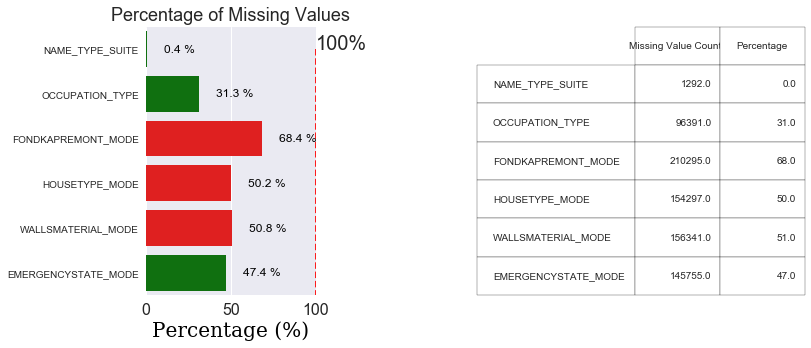

In [8]:
missing_values(train.select_dtypes(include ="object"), figsize=(8, 5))

##### Distribution of unique classes in object columns

Number of Unique categories in the object columns: 

 NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                8
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               19
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             5
HOUSETYPE_MODE                 4
WALLSMATERIAL_MODE             8
EMERGENCYSTATE_MODE            3
dtype: int64 

Distribution of Category Variables:



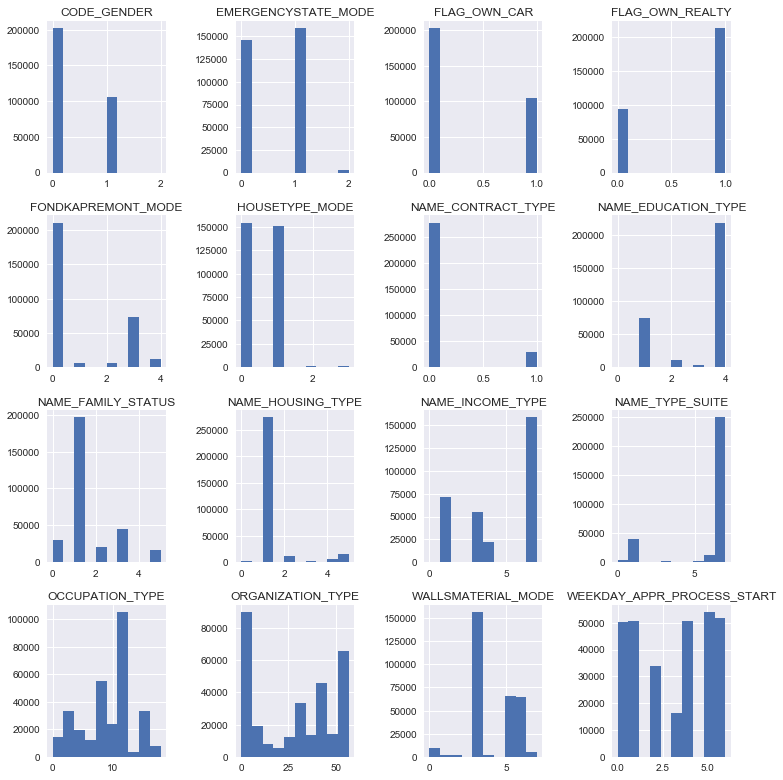

In [9]:
def category_distribution(df):
    # Selecting object columns
    le = LabelEncoder()
    train_object = df.select_dtypes(include ="object")
    object_columns = application_train.select_dtypes(include ="object").columns
    # Converting np.nan to "NAN"
    for i in object_columns:
        train_object[i].replace(np.nan, 'NaN', inplace=True)
    # Applying label_encoder
    train_object_le= train_object.apply(le.fit_transform)

    train_object_le.hist(figsize=[11,11])
    plt.tight_layout()
    # Number of unique classes in each class object
    print("Number of Unique categories in the object columns:", "\n\n",train_object.apply(pd.Series.nunique, axis = 0),"\n")
    print("Distribution of Category Variables:\n")
category_distribution(train)

#### Clearly the categories in the object columns are not balanced except the "WEEKDAY_APPR_PROCESS_START". 

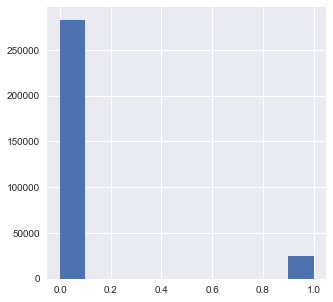

In [10]:
# Distribution of target variables
train.TARGET.hist(figsize=[5,5])


#### Distribution of target variables are not balanced as well, so we need to do some operations. 

##### We need to deal with category variables. We will use both LabelEncoder (for columns with two catergories) and OneHotEncoder ( for the rest)


In [11]:
train= application_train.copy()
test = application_test.copy()
#pd.get_dummies(train).shape, pd.get_dummies(test).shape

In [12]:
def encode(df):
    le = LabelEncoder()
    oe = OneHotEncoder()
    le_col=[]
    for col in df:
        if df[col].dtype =="object":
            if df[col].nunique()==2:
                df[col].replace(np.nan, "NAN", inplace=True)
                le_col.append(col)
                le.fit(df[col])
                df[col] = le.transform(df[col])
    print("These {} columns ({}) are label encoded".format(len(le_col), le_col))
    print("Dimensions before OneHotEncoding : {}".format(df.shape))
    df = pd.get_dummies(df)
    print("Dimensions after OneHotEncoding : {}".format(df.shape))
    
    return df
                
train =encode(train)
train.head()


These 4 columns (['NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'EMERGENCYSTATE_MODE']) are label encoded
Dimensions before OneHotEncoding : (307511, 122)
Dimensions after OneHotEncoding : (307511, 242)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden
0,100002,1,0,0,1,0,202500.0,406597.5,24700.5,351000.0,...,1,0,0,0,0,0,0,0,1,0
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,1,0,0,1,0,0,0,0,0,0
2,100004,0,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,0,1,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
test = encode(test)
test.head()

These 5 columns (['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'EMERGENCYSTATE_MODE']) are label encoded
Dimensions before OneHotEncoding : (48744, 121)
Dimensions after OneHotEncoding : (48744, 237)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden
0,100001,0,0,0,1,0,135000.0,568800.0,20560.5,450000.0,...,1,0,0,0,0,0,0,0,1,0
1,100005,0,1,0,1,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0,0,0,0,0,0
2,100013,0,1,1,1,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0,0,0,0,0,0
3,100028,0,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,...,1,0,0,0,0,0,0,1,0,0
4,100038,0,1,1,0,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# Here I am building a pipeline

from sklearn_pandas import DataFrameMapper
from sklearn_pandas import CategoricalImputer
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import Imputer

nulls_per_column = train.isnull().sum()
categorical_feature_mask = train.dtypes == object

categorical_columns = train.columns[categorical_feature_mask].tolist()
non_categorical_columns = train.columns[~categorical_feature_mask].tolist()

# Apply numeric imputer
numeric_imputation_mapper = DataFrameMapper([(numeric_feature,Imputer(strategy="median")) for numeric_feature in non_categorical_columns],
                                            input_df=True,
                                            df_out=True
                                           )

# Apply categorical imputer
categorical_imputation_mapper = DataFrameMapper([(category_feature, CategoricalImputer()) for category_feature in categorical_columns],
                                                input_df=True,
                                                df_out=True
                                               )


# Combine the numeric and categorical transformations
numeric_categorical_union = FeatureUnion([
                                          ("num_mapper", numeric_imputation_mapper),
                                          ("cat_mapper", categorical_imputation_mapper)
                                         ])


In [20]:
numeric_categorical_union
categorical_imputation_mapper

DataFrameMapper(default=False, df_out=True, features=[], input_df=True,
        sparse=False)

In [ ]:
# Create full pipeline
pipeline = Pipeline([
                     ("featureunion", numeric_categorical_union),
                     ("dictifier", Dictifier()),
                     ("vectorizer", DictVectorizer(sort=False)),
                     ("clf", xgb.XGBClassifier(max_depth=3))
                    ])

### Distribution of target variables in each of the columns in the training dataset

In [ ]:
# Let's see